<a href="https://colab.research.google.com/github/nik2512/Machine-Learning-Projects/blob/main/Fashion%20Class%20Classification/Fashion_Class_Classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP #2: IMPORTING THE DATA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep = ',')

In [4]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

STEP #3: VISUALIZATION OF DATASET


In [5]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [9]:
fashion_train_df.shape

(60000, 785)

In [10]:
fashion_test_df.shape


(10000, 785)

In [11]:
training = np.array(fashion_train_df, dtype = 'float32')

In [12]:
testing = np.array(fashion_test_df, dtype = 'float32')

9.0

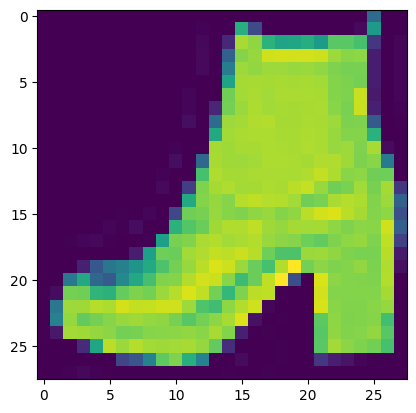

In [13]:
import random
i = random.randint(1, 22242)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i, 0]
label

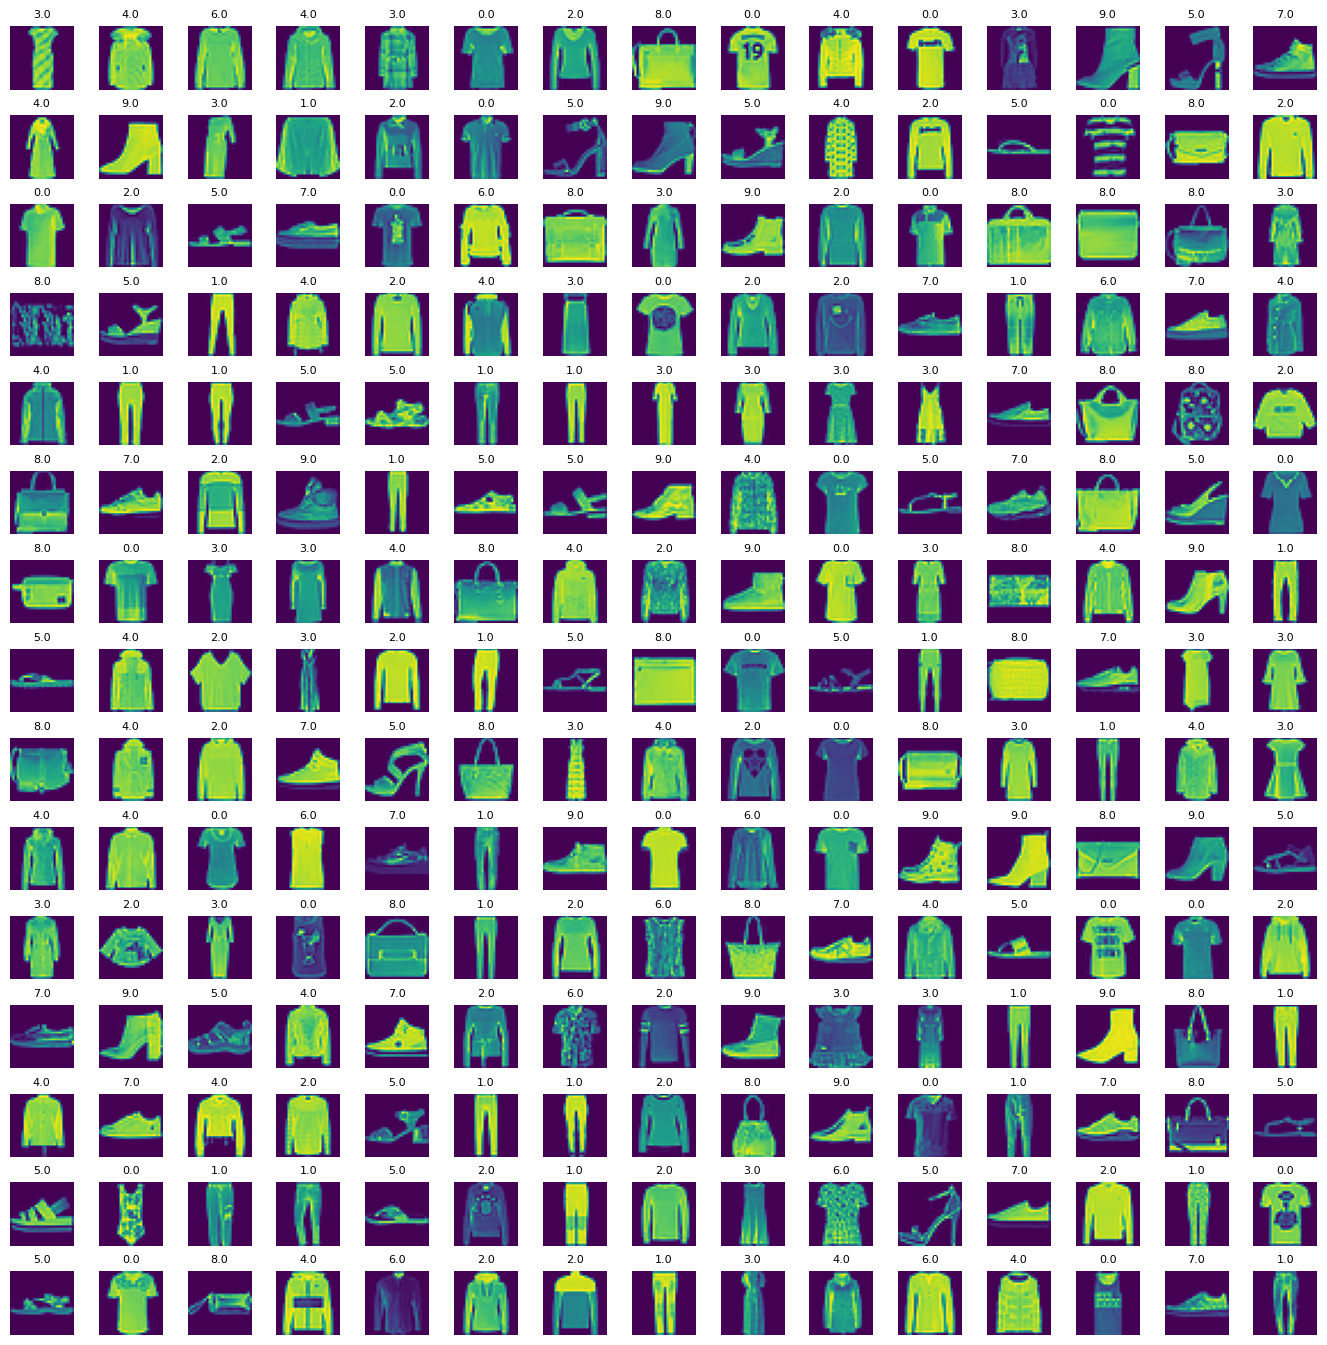

In [14]:
# Let's view more images in grid format
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17, 17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow(training[index, 1:].reshape((28, 28)))
    axes[i].set_title(training[index, 0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)



STEP #4 TRAINING THE MODEL


In [15]:
X_train = training[:, 1:]/255 #To do normalization
y_train = training[:, 0]

In [16]:
X_test = testing[:, 1:]/255 #To do normalization
y_test = testing[:, 0]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)
#to avoid overfitting

In [19]:
#Reshape to 28*28 is done to feed all the data (train, test, validation) to CNN

X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [20]:
X_train.reshape

<function ndarray.reshape>

In [21]:
X_test.reshape

<function ndarray.reshape>

In [22]:
X_validate.reshape

<function ndarray.reshape>

In [24]:
import keras


In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [26]:
cnn_model = Sequential()

In [27]:
cnn_model.add(Conv2D(32, 3, 3 , input_shape = (28, 28, 1), activation = 'relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [29]:
cnn_model.add(Flatten())

In [38]:
cnn_model.add(Dense(32, activation = 'relu')) #output_dim is not used anymore. Was giving error. Need to verify.

In [39]:
cnn_model.add(Dense(10, activation = 'sigmoid')) #output_dim is not used anymore. Was giving error. Need to verify.

In [43]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])
#lr is upgraded to learning_rate

In [44]:
epoch = 50

In [46]:
cnn_model.fit(X_train, y_train, batch_size = 512, epochs = epoch, verbose = 1, validation_data = (X_validate, y_validate))
#

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.2176 - loss: 2.2069 - val_accuracy: 0.3957 - val_loss: 1.7715
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4819 - loss: 1.6256 - val_accuracy: 0.6221 - val_loss: 1.2426
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6493 - loss: 1.1488 - val_accuracy: 0.6906 - val_loss: 0.9486
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7061 - loss: 0.8974 - val_accuracy: 0.7227 - val_loss: 0.7852
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7319 - loss: 0.7609 - val_accuracy: 0.7563 - val_loss: 0.6925
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7593 - loss: 0.6774 - val_accuracy: 0.7705 - val_loss: 0.6332
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.7757 - loss: 0.6235 - val_accuracy: 0.7910 - val_loss: 0.5864
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7932 - loss: 0.5868 - val_accuracy: 0.8054 - v

STEP

In [47]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8591 - loss: 0.3650
Test Accuracy : 0.867


In [49]:
predicted_classes = cnn_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [50]:
predicted_classes

array([[9.94396091e-01, 3.13242488e-02, 2.81018853e-01, ...,
        6.22236530e-06, 1.22345991e-01, 2.57594977e-04],
       [1.20304227e-01, 9.99764204e-01, 2.88249403e-01, ...,
        5.55090094e-03, 1.14840437e-02, 4.96864086e-04],
       [8.81781578e-01, 5.77205187e-03, 9.66693997e-01, ...,
        1.78754708e-05, 1.94080435e-02, 5.10869490e-04],
       ...,
       [1.01454675e-01, 3.60837468e-04, 2.43020756e-03, ...,
        7.82499555e-03, 9.97512221e-01, 3.14939693e-02],
       [5.71178854e-01, 2.32434482e-03, 6.70252666e-02, ...,
        2.76467734e-04, 9.73571241e-01, 3.78384674e-03],
       [4.73588854e-01, 9.53601182e-01, 8.78156364e-01, ...,
        2.36864827e-04, 1.23890555e-02, 1.93618773e-03]], dtype=float32)

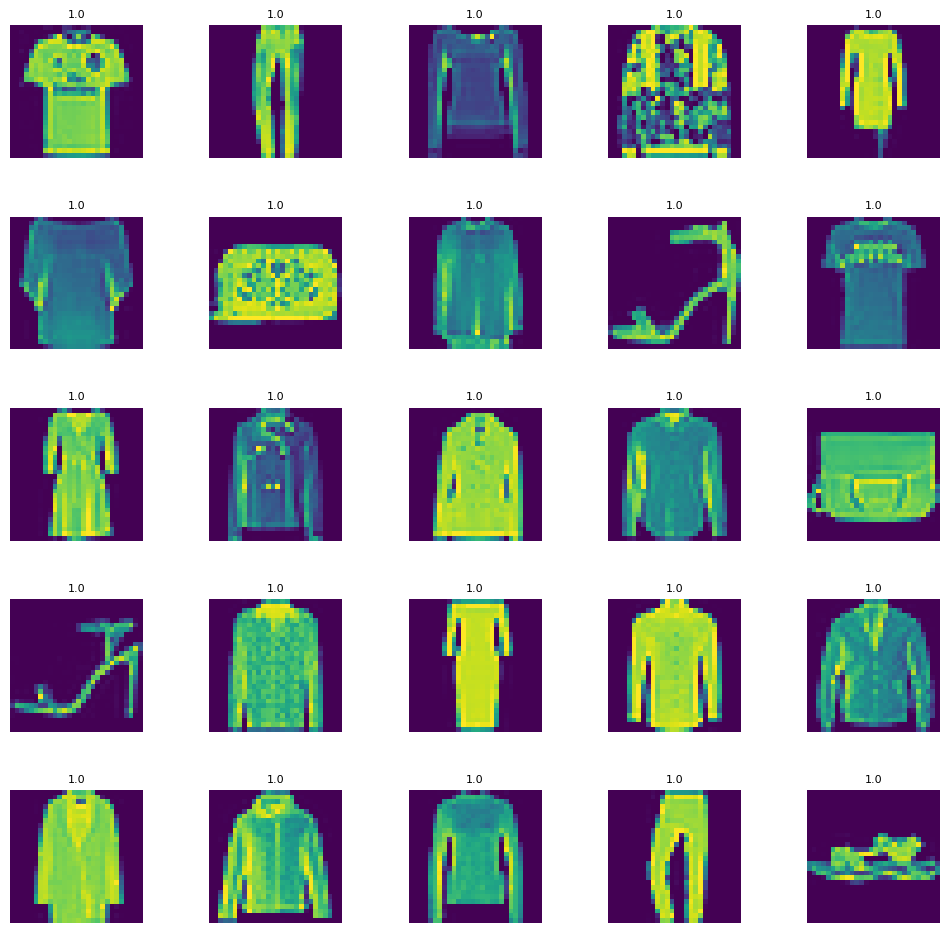

In [64]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)
#Changes done in set_Title

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot = True)
#

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [66]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names = target_names))
#

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets